In [1]:
import os
import h5py
import json
import keras
import random 
import imageio
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn import tree
from keras import backend as K
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

Using TensorFlow backend.


In [2]:
Data = pd.read_csv('DsDnsPrScTch.csv') 

C:\Users\REDLINE PC\.conda\envs\Laptop\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Data["Teacher First Project Posted Date"]=pd.to_datetime(Data["Teacher First Project Posted Date"])
Data["Project Fully Funded Date"]=pd.to_datetime(Data["Project Fully Funded Date"])
Data["Project Expiration Date"]=pd.to_datetime(Data["Project Expiration Date"])
Data["Project Posted Date"]=pd.to_datetime(Data["Project Posted Date"])
Data["Donation Received Date"]=pd.to_datetime(Data["Donation Received Date"])
Data["Number of dates since posted"]=Data.loc[:,"Donation Received Date"]-Data.loc[:,"Project Posted Date"]

In [4]:
Data.dtypes

Unnamed: 0                                          int64
Project ID                                         object
Donation ID                                        object
Donor ID                                           object
Donation Included Optional Donation                object
Donation Amount                                   float64
Donor Cart Sequence                                 int64
Donation Received Date                     datetime64[ns]
Donor City                                         object
Donor State                                        object
Donor Is Teacher                                   object
Donor Zip                                          object
Unnamed: 0.1                                        int64
School ID                                          object
Teacher ID                                         object
Teacher Project Posted Sequence                     int64
Project Type                                       object
Project Title 

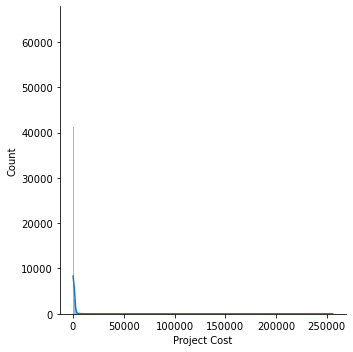

In [7]:
sns.displot(Data, x="Project Cost", kde=True)

(array([4.607471e+06, 5.720000e+02, 2.800000e+01, 5.000000e+00,
        2.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.0000000e-02, 6.0000090e+03, 1.2000008e+04, 1.8000007e+04,
        2.4000006e+04, 3.0000005e+04, 3.6000004e+04, 4.2000003e+04,
        4.8000002e+04, 5.4000001e+04, 6.0000000e+04]),
 <a list of 10 Patch objects>)

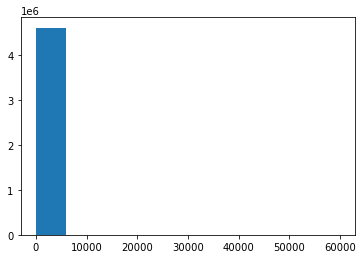

In [6]:
plt.hist(Data["Donation Amount"])

In [ ]:
Grouped_data=Data.groupby(["Project ID"]).max()
Grouped_data["Donation Amount"]=0
Grouped_data["Donation ID"]="initial_"+Grouped_data["Donation ID"]
Grouped_data["Donor ID ID"]="initial_"+Grouped_data["Donor ID ID"]

In [ ]:
Grouped_data.dtypes

In [ ]:
T=pd.Timedelta('30 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount","Project Cost",
         "Project Posted Date","Project Expiration Date","Donation Received Date"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]
sub_Data["Raised funds to project cost ratio"]=sub_Data["Donation Amount"]/sub_Data["Project Cost"]
Grouped_data=sub_Data.groupby(["Project ID"]).sum()
Grouped_data_Final = sub_Data.groupby(["Project ID"]).max()
Grouped_data_Final["Raised funds to project cost ratio"]=Grouped_data["Raised funds to project cost ratio"]

f, axes = plt.subplots(1, 1,figsize=(10,7))

y="Raised funds to project cost ratio"
q1 = Grouped_data_Final[y].quantile(0)
q3 = Grouped_data_Final[y].quantile(1)
mask = Grouped_data_Final[y].between(q1, q3, inclusive=True)
iqr = Grouped_data_Final.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y )
print(iqr.describe())

G30=Grouped_data_Final

In [ ]:
T=pd.Timedelta('120 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount","Project Cost",
         "Project Posted Date","Project Expiration Date","Donation Received Date"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]
sub_Data["Raised funds to project cost ratio"]=sub_Data["Donation Amount"]/sub_Data["Project Cost"]
Grouped_data=sub_Data.groupby(["Project ID"]).sum()
Grouped_data_Final = sub_Data.groupby(["Project ID"]).max()
Grouped_data_Final["Raised funds to project cost ratio"]=Grouped_data["Raised funds to project cost ratio"]

f, axes = plt.subplots(1, 1,figsize=(10,7))

y="Raised funds to project cost ratio"
q1 = Grouped_data_Final[y].quantile(0)
q3 = Grouped_data_Final[y].quantile(1)
mask = Grouped_data_Final[y].between(q1, q3, inclusive=True)
iqr = Grouped_data_Final.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y )
print(iqr.describe())

G120=Grouped_data_Final

In [ ]:
print(len(G30),len(G120))
G30['Label'] = G30.apply(lambda x : 1  if x['Raised funds to project cost ratio'] < 0.14  else 0, axis=1)
print("G30 Done")
G120['Label'] = G120.apply(lambda x : 1  if x['Raised funds to project cost ratio'] < 0.47  else 0, axis=1)
print("G120 Done")

In [ ]:
G120

In [ ]:
G120["L30"]=G30["Label"]

In [ ]:
G120[G120["L30"]==1 and G120["Label"]==1]

In [ ]:
OxG= G120[G120["L30"]==1]
OOG= OxG[OxG["Label"]==1]
OzG= OxG[OxG["Label"]==0]

zxG= G120[G120["L30"]==0]
zzG= zxG[zxG["Label"]==0]
zOG= zxG[zxG["Label"]==1]

In [ ]:
print("OxG = ",len(OxG))
print("OOG = ",len(OOG))
print("OzG = ",len(OzG))
print("=======================================")
print("zxG = ",len(zxG))
print("zzG = ",len(zzG))
print("zOG = ",len(zOG))

In [ ]:
#===============================================================================================
#                                  Model Training Funstion
#===============================================================================================

def Train_Model( Model_variables_con,Model_variables_cat,Data,
                Time_period_indays=30,K=100,Fund_Ratio_treshold=0.142):
    # Time_period should be in days 
    # K is the Top-K value

    #=================================== Initiate the List Variables ================================
    
    Time_points = []
    Output=dict()
    Training_1,Training_size=[],[]
    Testing_1,Testing_size=[],[]
    Training_median,Testing_median=[],[]

    #=================================== Initiate the Columns ======================================
    
    print("Initiatnig the Columns")
    Main_Variables = list(set(["Project ID","Project Posted Date","Project Expiration Date","Donation Received Date",
         "Project Cost","Donation Amount","Number of dates since posted"]+Model_variables_cat+Model_variables_con))
    Model_variables = Model_variables_con.copy()
    print("Variables considered in model training")
    for i in sub_var: print(">",i,i in Data.columns) # print all variables considered.
    print()
    Data["Number of dates since posted"]=Data.loc[:,"Donation Received Date"]-Data.loc[:,"Project Posted Date"]
    sub_Data = Data.loc[:,Main_Variables]
        
    
    #=================================== Initiate Time Variables ====================================
    
    print("Initiate Time Variables")
    MaxT = pd.Timestamp("2018-05-01 00:00:00")  #max(Data["Project Posted Date"])
    MinT = pd.Timestamp("2013-01-01 00:00:00")  #min(Data["Project Posted Date"])
    Time_period = timedelta(days=Time_period_indays)  
    T_current = MinT- Time_period +timedelta(days=120) 
    sub_Data["Number of dates since posted"] = sub_Data["Number of dates since posted"]/ np.timedelta64(1, 'D')
    
    
    #=================================== Loop over time frams =======================================
    
    print("Time iteration is starting\n")
    while (T_current<MaxT-Time_period):
        
        T_current = T_current+ Time_period
        Time_points+=[T_current]
        T_Train_start = T_current-timedelta(days=120)  # Start of the data frame
        T_Train_end = T_current-Time_period  #End of the data frame
        print("As of Date:",T_current,"\n"+"="*85)
        
    #====================================== Extract the frams ======================================= 
    
        # Extracts projects posted before the Current(As of) date
        Data_in_TimeWindow = sub_Data[sub_Data["Project Posted Date"] < pd.to_datetime(T_current)]  
        
        # Extracts projects posted after the start date of the Time window
        Data_in_TimeWindow = Data_in_TimeWindow[Data_in_TimeWindow["Project Posted Date"] > pd.to_datetime(T_Train_start)]
        
        #Time period to be consided for the donations since posted (30days, as default)
        Data_in_TimeWindow = Data_in_TimeWindow[Data_in_TimeWindow["Number of dates since posted"]< Time_period_indays]
        
        #Express the donation amount as a ratio of to the Project cost
        Data_in_TimeWindow["Fund_Ratio"]=Data_in_TimeWindow["Donation Amount"]/Data_in_TimeWindow["Project Cost"]
                
    
    #=================================== Training set Creation =====================================
    
        #extract the training set from the timewindow
        Train_Data = Data_in_TimeWindow[Data_in_TimeWindow["Project Posted Date"] < pd.to_datetime(T_Train_end)]
        
        #Group by Project ID
        Train_Data_CR=Train_Data.groupby(["Project ID"]).sum() 
        Train_Data_Final=Train_Data.groupby(["Project ID"]).max()
        Train_Data_Final["Fund_Ratio"]=Train_Data_CR["Fund_Ratio"]
        Train_Data_Final["Donation Amount"]=Train_Data_CR["Donation Amount"]
        
        # Genarate the Label for the dataset 
        Train_Data_Final['Label'] = Train_Data_Final.apply(lambda x : 1  if x['Fund_Ratio'] < 
                                                           Fund_Ratio_treshold  else 0, axis=1)
        
        X_train = Train_Data_Final.loc[:,Model_variables]
        Y_train = np.array(Train_Data_Final.loc[:,["Label"]])[:,0]
        
        
    #==================================== Testing set Creation =====================================
    
        #extract the training set from the timewindow
        Test_Data = Data_in_TimeWindow[Data_in_TimeWindow["Project Posted Date"] >= pd.to_datetime(T_Train_end)]
        
        #Group by Project ID
        Test_Data_CR=Test_Data.groupby(["Project ID"]).sum() 
        Test_Data_Final=Test_Data.groupby(["Project ID"]).max()
        Test_Data_Final["Fund_Ratio"]=Test_Data_CR["Fund_Ratio"]
        Test_Data_Final["Donation Amount"]=Test_Data_CR["Donation Amount"]
        
        # Genarate the Label for the dataset 
        Test_Data_Final['Label'] = Test_Data_Final.apply(lambda x : 1  if x['Fund_Ratio'] < 
                                                         Fund_Ratio_treshold  else 0, axis=1)
        X_test = Test_Data_Final.loc[:,Model_variables]
        Y_test = np.array(Test_Data_Final.loc[:,["Label"]])[:,0]
        
        
    #===================================== Label Analysis =========================================
        
        Training_1+=[len(Train_Data_Final[Train_Data_Final["Label"]==0])]
        Training_size+=[len(Train_Data_Final)]
        
        Testing_1+=[len(Test_Data_Final[Test_Data_Final["Label"]==0])]
        Testing_size+=[len(Test_Data_Final)]
        
        Training_median+=[Train_Data_Final["Fund_Ratio"].median()]
        Testing_median+=[Test_Data_Final["Fund_Ratio"].median()]
    
    
    Output["Training_median"]=Training_median
    Output["Testing_median"]=Testing_median
    Output["Training_1"]=Training_1
    Output["Training_size"]=Training_size
    Output["Testing_1"]=Testing_1
    Output["Testing_size"]=Testing_size
    Output["Time_points"]=Time_points
    return Output

In [ ]:
Model_variables_con= ["Project Cost","Number of dates since posted","School Percentage Free Lunch","Project Cost"]
Model_variables_cat= []

Output= Train_Model( Model_variables_con,Model_variables_cat,
                                    Data,Time_period_indays=30,K=100,Fund_Ratio_treshold=0.142)

In [ ]:
n_cols=1
n_rows=1
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*15,n_rows*7))
axs.set_xlabel("Time in years",fontsize=15);
axs.set_ylabel("Fund:Cost_Ratio",fontsize=15);

plt.plot(Output["Time_points"], Output["Testing_median"],label='Testing_median')
plt.plot(Output["Time_points"], Output["Training_median"],label="Training_median")
plt.plot(Output["Time_points"], np.array(Output["Training_median"])*0+0.1422,'r-',label="Average_median")

plt.legend(fontsize=15)

In [ ]:
n_cols=1
n_rows=1
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*15,n_rows*7))
axs.set_xlabel("Time in years",fontsize=15);
axs.set_ylabel("Count",fontsize=15);

plt.plot(Output["Time_points"], Output["Training_size"],label='Total Training')
plt.plot(Output["Time_points"], Output["Training_1"],label="Training = 1")
plt.plot(Output["Time_points"], Output["Testing_size"],label='Total Testing')
plt.plot(Output["Time_points"], Output["Testing_1"],label="Testing = 1")

plt.legend(fontsize=15)